In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/pbs/home/c/cmurray/cluster_likelihood/')
import modules.simulation as simulation
import pyccl as ccl

In [2]:
# Define custom style
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 10,
    "figure.figsize": (3.543, 2.165),
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 4,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.frameon": False,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.major.width": 1,
    "ytick.major.width": 1,
    "xtick.minor.width": 0.5,
    "ytick.minor.width": 0.5,
    "savefig.format": "pdf"
})

cm_to_inch = 0.393701

In [24]:
simulator = simulation.UniverseSimulator( None , '/pbs/home/c/cmurray/cluster_likelihood/config/capish.ini')

In [25]:
cosmo_lcdm = ccl.Cosmology( Omega_c = 0.265, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96)
                       
cosmo_desi = ccl.Cosmology( Omega_c = 0.25, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96,
                       w0 = -0.5,   # change dark energy equation of state parameter w0
                       wa = -2.,
                       extra_parameters = {"camb": {'dark_energy_model' : 'ppf', }} ) 

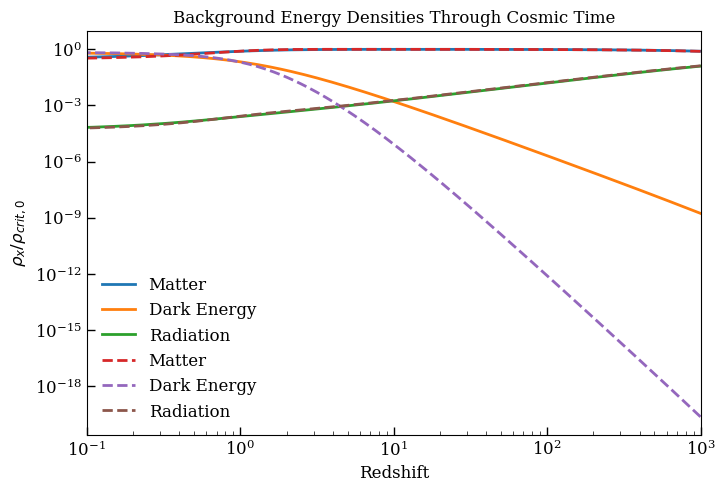

In [26]:
# Compute and plot background energy densities as a function of scale factor

a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit = ccl.background.rho_x(  cosmo_lcdm, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit

plt.figure(figsize=(7,5))
plt.plot(1/a-1, rho_m, label='Matter')
plt.plot(1/a-1, rho_de, label='Dark Energy')
plt.plot(1/a-1, rho_rad, label='Radiation')

rho_crit = ccl.background.rho_x(  cosmo_desi, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit

plt.plot(1/a-1, rho_m , '--', label='Matter')
plt.plot(1/a-1, rho_de , '--', label='Dark Energy')
plt.plot(1/a-1, rho_rad , '--', label='Radiation')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit,0}$')
plt.title('Background Energy Densities Through Cosmic Time')
plt.legend()
plt.tight_layout()
plt.xlim( 0.1 , 1000 )
plt.xscale('log')
plt.yscale('log')

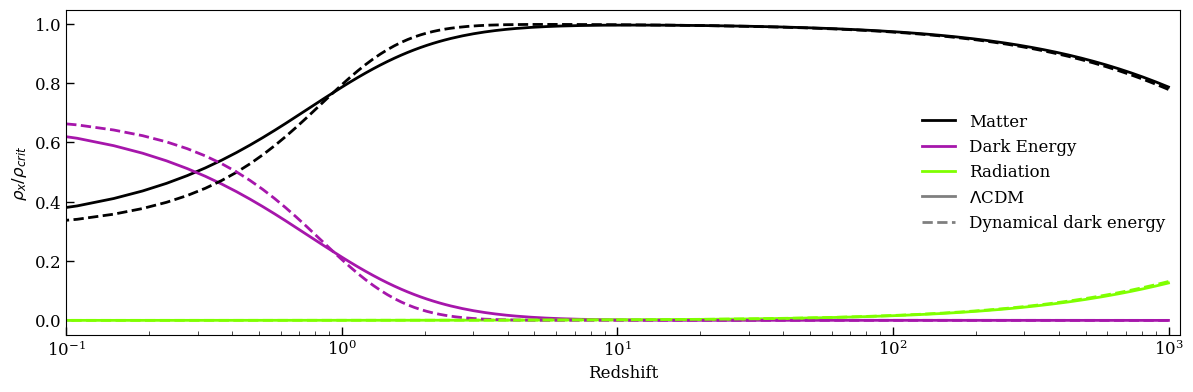

In [27]:
a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit = ccl.background.rho_x(  cosmo_lcdm, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit

plt.figure(figsize=(12,4))
plt.plot(1/a-1, rho_m , 'k', label='Matter')
plt.plot(1/a-1, rho_de , c='#a616ab', label='Dark Energy')
plt.plot(1/a-1, rho_rad, c ='chartreuse' , label='Radiation')

rho_crit = ccl.background.rho_x(  cosmo_desi, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit

plt.plot(1/a-1, rho_m  , '--', c='k')
plt.plot(1/a-1, rho_de  , '--', c='#a616ab')
plt.plot(1/a-1, rho_rad , '--', c ='chartreuse')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit}$')
# plt.title('Background Energy Densities Through Cosmic Time')
plt.tight_layout()
plt.xlim( 0.1 , 1100 )
plt.xscale('log')
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
plt.legend()


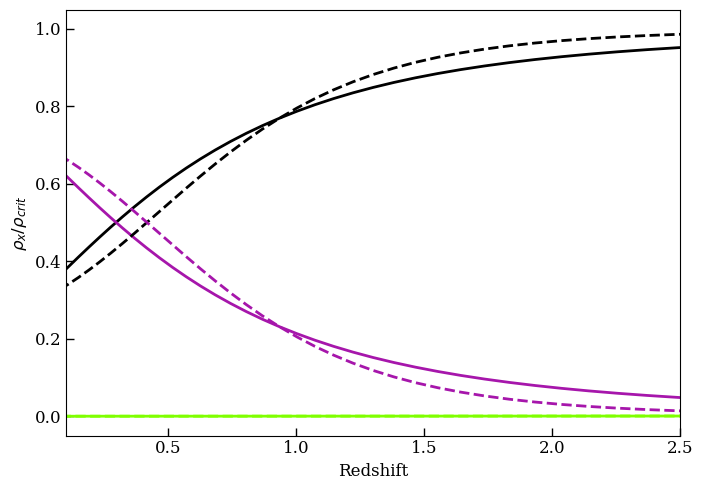

In [28]:
# Compute and plot background energy densities as a function of scale factor

a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit = ccl.background.rho_x(  cosmo_lcdm, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit

plt.figure(figsize=(7,5))
plt.plot(1/a-1, rho_m , 'k', label='Matter')
plt.plot(1/a-1, rho_de , c='#a616ab', label='Dark Energy')
plt.plot(1/a-1, rho_rad, c ='chartreuse' , label='Radiation')

rho_crit = ccl.background.rho_x(  cosmo_desi, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit

plt.plot(1/a-1, rho_m  , '--', c='k')
plt.plot(1/a-1, rho_de  , '--', c='#a616ab')
plt.plot(1/a-1, rho_rad , '--', c ='chartreuse')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit}$')
# plt.title('Background Energy Densities Through Cosmic Time')
plt.tight_layout()
plt.xlim( 0.1 , 2.5 )
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
# plt.legend()

#plt.yscale('log')

In [40]:
def halo_counts( cosmo , log10min = 14.3 , log10max = 15.3 , z_bins = np.linspace(0, 2, 21) ,c = 'k' , linestyle = '-' , use_label = True ):
    """
    Calculate the halo counts in a given mass range at redshift z.
    """
    log10ms , redshifts = simulator.halo_catalogue_class.get_halo_catalogue( cosmo )

    z_counts, _ = np.histogram(redshifts[ ( log10ms > log10min ) & ( log10ms < log10max )], bins=z_bins)

    #plt.step( z_cents , z_counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')
    if use_label == True:
        label = f'{log10min:.1f} < log10(M/M_sun) < {log10max:.1f}'
    else:
        label = None
    plt.plot( z_cents , z_counts, ls = linestyle, c = c, label=label )
    return

In [30]:
z_bins = np.linspace( 0.1 , 2.5 , 40 )
z_cents = 0.5 * (z_bins[1:] + z_bins[:-1])

In [31]:
z_bins

array([0.1       , 0.16153846, 0.22307692, 0.28461538, 0.34615385,
       0.40769231, 0.46923077, 0.53076923, 0.59230769, 0.65384615,
       0.71538462, 0.77692308, 0.83846154, 0.9       , 0.96153846,
       1.02307692, 1.08461538, 1.14615385, 1.20769231, 1.26923077,
       1.33076923, 1.39230769, 1.45384615, 1.51538462, 1.57692308,
       1.63846154, 1.7       , 1.76153846, 1.82307692, 1.88461538,
       1.94615385, 2.00769231, 2.06923077, 2.13076923, 2.19230769,
       2.25384615, 2.31538462, 2.37692308, 2.43846154, 2.5       ])

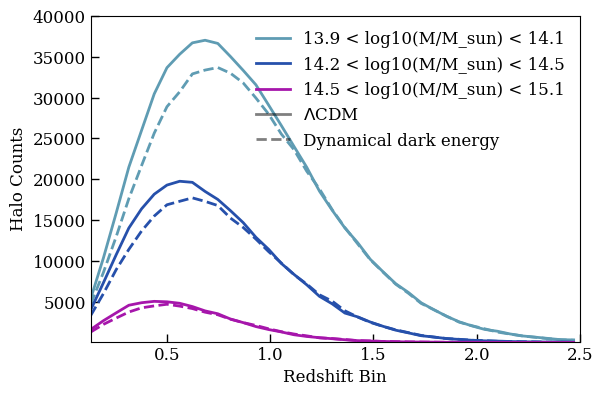

In [42]:
plt.figure(figsize=(6, 4))

halo_counts( cosmo_lcdm , z_bins = z_bins , log10min = 13.95 , log10max = 14.1 , c = '#5f9cb3')
halo_counts( cosmo_desi , z_bins = z_bins , log10min = 13.95 , log10max = 14.1 , c = '#5f9cb3', linestyle='--' , use_label=False)

halo_counts( cosmo_lcdm , z_bins = z_bins , log10min = 14.2 , log10max = 14.5 , c= '#2650ab')
halo_counts( cosmo_desi , z_bins = z_bins , log10min = 14.2 , log10max = 14.5 , c= '#2650ab' , linestyle='--' , use_label=False)

halo_counts( cosmo_lcdm , z_bins = z_bins , log10min = 14.5 , log10max = 15.1 , c = '#a616ab')
halo_counts( cosmo_desi , z_bins = z_bins , log10min = 14.5 , log10max = 15.1 , c = '#a616ab' , linestyle='--' , use_label=False)

plt.xlabel('Redshift Bin')
plt.ylabel('Halo Counts')
plt.tight_layout()
#plt.yscale('log')
plt.ylim( 1e2  , 4e4 )
plt.xlim( 0.13 , 2.5)
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
plt.legend()

In [33]:
def halo_counts_mz( cosmo , ls = '-'):
    log10ms , redshifts = simulator.halo_catalogue_class.get_halo_catalogue( cosmo )
    for i in range(len(z_bins)-1):
        mask = (redshifts >= z_bins[i]) & (redshifts < z_bins[i+1])
        counts, edges = np.histogram(log10ms[mask], bins=mass_bins)
        bin_centers = 0.5 * (edges[1:] + edges[:-1])
        #plt.step(bin_centers, counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')
        plt.plot(bin_centers, counts, ls , label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}' )
    return

In [13]:
# Define redshift bins
z_bins = np.linspace(redshifts.min(), redshifts.max(), 15 )
z_bins = np.array( [ 0.3 , 0.6 , 0.9 , 2.5])
mass_bins = np.linspace( 13.8 , 15.4, 20)

plt.figure(figsize=(8, 6))

halo_counts_mz(cosmo_lcdm , '-')
halo_counts_mz(cosmo_desi , '--')

plt.xlabel(r'$\log_{10}(M)$')
plt.ylabel('Number of Halos')
plt.legend(title='Redshift')
# plt.title('Halo Mass Function in Redshift Bins')
plt.tight_layout()
plt.yscale('log')
plt.ylim( 1e2 , 1e5)
plt.xlim( 14 , 15.2 )

NameError: name 'redshifts' is not defined

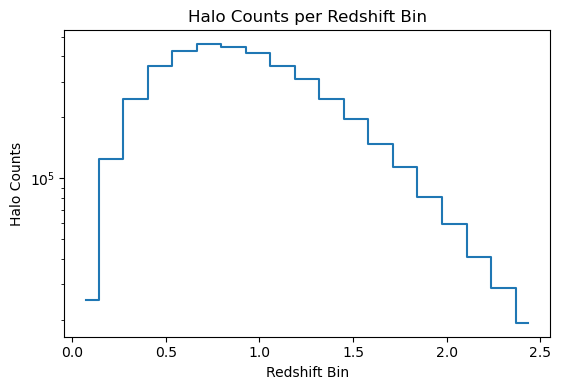

In [ ]:
# Count halos in each redshift bin and plot
z_bins = np.linspace(redshifts.min(), redshifts.max(), 20)
z_cents = 0.5 * (z_bins[1:] + z_bins[:-1])

z_counts, _ = np.histogram(redshifts, bins=z_bins)


plt.figure(figsize=(6, 4))

plt.step( z_cents , z_counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')

plt.xlabel('Redshift Bin')
plt.ylabel('Halo Counts')
plt.title('Halo Counts per Redshift Bin')
plt.tight_layout()
plt.yscale('log')
plt.show()
